# INTERFACE COM OUTRAS LINGUAGENS  DE PROGRAMAÇÃO

A linguagem de programação Julia é estruturada com uma extensa biblioteca básica além de vários pacotes adicionais que permitem ao programador elaborar códigos para as mais diferentes aplicações. No entanto, existem muitas bibliotecas para computação numérica escritas em outras linguagens de programação que permitem utilizar recursos que ainda não são implementadas em Julia. Dessa forma, Julia possui suporte nativo para funções em C e FORTRAN, além de suporte para interfaces C++, R, Python e outras linguagens através de pacotes adicionais.

## INTERFACE COM PYTHON

O pacote `PyCall.jl` criado por Steve Johnson, fornece à linguagem  Julia  uma interface para utilizar funções e bibliotecas da linguagem  Python  sem utilizar diretamente o binário  Python  instalado no computador - todos os comandos são repassados diretamente para a biblioteca  libpython . A melhor maneira para trabalhar com  PyCall  é deixar o `Conda.jl` gerenciar os pacote do  Python  independentemente das versões instaladas em seu sistema. Para isto use:

```julia
using Pkg
ENV["PYTHON"]=""
Pkg.build("PyCall")
# isto será feito apenas uma vez.
```
Caso seja interessante usar sua própria versão do  Python  instalado no sistema (melhor opção caso use o anaconda) , informe a localização do binário (ex: `/home/USUARIO/anacondaX/bin/pythonX.Y`) como descrito abaixo:
```julia
ENV["PYTHON"] = "PATH"
```
OBS: Se estiver utilizando o  Jupyter  É importante que **somente este notebook esteja funcionando** para que todo o processo ocorra bem. Caso ocorra erro do tipo:
> "LOCKERROR: It looks like conda is already doing something."

Encerre os outros notebooks e execute os comando acima novamente.

In [4]:
using Pkg
ENV["PYTHON"]="/home/jmarcellopereira/anaconda2/bin/python2.7"
Pkg.build("PyCall")

  Building Conda ─→ `~/.julia/packages/Conda/m7vem/deps/build.log`
  Building PyCall → `~/.julia/packages/PyCall/rUul9/deps/build.log`


Para importar um módulo do Python use a sintaxe:
```julia
@pyimport modulo as nome
```

### NUMPY

"NumPy (abreviação de Python numérico) é uma biblioteca Python de código aberto para computação científica" (IVAN, 2015). Foi criado pelo engenheiro de software Jim Hugunin que projetou o módulo NumericPython para fornecer capacidades semelhantes às de outros softwares como  o MatLab®. NumPy  incorpora diversas ferramentas matemáticas para cálculo diferencial e integral, transformadas de Fourier, álgebra linear e outras.

Sintaxe:
```julia
using PyCall
@pyimport numpy as nome_alias
```

**Interpolação linear unidimensional com NumPy**

A função `interp()` calcular valores intermediários ao longo de uma curva de acordo com um conjunto de pontos. Sintaxe:
```julia
interp(x_valor, x_dados, y_dados)
```
Sendo:
* **x_valor**: valor x interpolado;  
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y".

In [1]:
using PyCall
@pyimport numpy as np

In [2]:
# dados
x_dados = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y_dados = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];

In [3]:
# calcular para x = 5.5
np.interp(5.6, x_dados, y_dados)

8.68

In [4]:
x_interp = 0:0.1:10
y_interp = np.interp(x_interp, x_dados, y_dados);

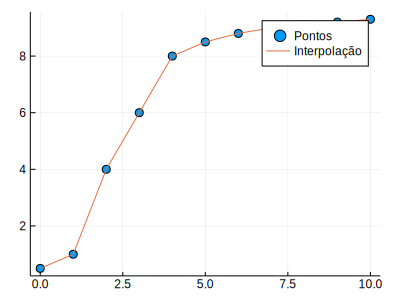

In [5]:
using Plots
gr()

scatter(x_dados, y_dados, label = "Pontos")
plot!(x_interp, y_interp, label = "Interpolação", size = (400, 300))

**Ajuste de curvas Polinomial com NumPy**

"A função `polyfit()` ajusta um conjunto de pontos de dados para um polinômio, mesmo que a função subjacente não seja contínua" (IVAN, 2015). A função `poly1d` gera o polinômio a partir dos coeficientes ajustados.

```julia
coeficientes_pol = numpy.polyfit(x_dados, y_dados, n)
nome_função_ajuste = numpy.poly1d(coeficientes_pol)
```
Sendo: 
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y";
* **n **: grau do polinômio.

In [6]:
# coeficientes
coeficientes_pol = np.polyfit(x_dados, y_dados, 5)
coeficientes_pol

6-element Array{Float64,1}:
 -0.002035256410256411
  0.05734994172494169 
 -0.569383741258741   
  2.1678248834498763  
 -0.855678904428844   
  0.4386363636362671  

In [7]:
# polinômio
pol_ajuste = np.poly1d(coeficientes_pol)

PyObject poly1d([ -2.03525641e-03,   5.73499417e-02,  -5.69383741e-01,
         2.16782488e+00,  -8.55678904e-01,   4.38636364e-01])

In [8]:
# testando a função ajuste
pol_ajuste(0.5)

0.48510093422195993

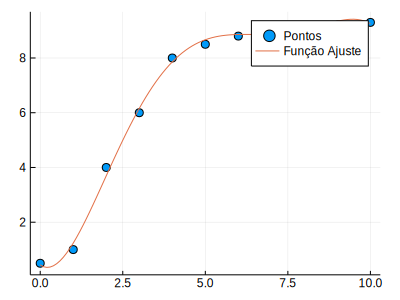

In [9]:
using Plots
gr()
xvals = 0:0.1:10

scatter(x_dados, y_dados, label = "Pontos")
plot!(x_interp, pol_ajuste.(x_interp), label = "Função Ajuste", size = (400, 300))

### SCIPY

SciPy é uma biblioteca formada por várias ferramentas numéricas livres para Python destinado as mais diferentes aplicações em ciências exatas e engenharia. "É construído sobre a estrutura de array do NumPy e leva a programação científica para um nível totalmente novo, fornecendo funções matemáticas avançadas como a integração, solvers de equações diferenciais ordinárias, funções especiais, otimizações, e muito mais" (BRESSERT, 2012).
Sintaxe:
```julia
using PyCall
@pyimport scipy.biblioteca as nome_alias
```
Bibliotecas Importantes:

- Funções especiais (scipy.special): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/special.html   
- Integração (scipy.integrate) : https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/integrate.html
- Optiização (scipy.optimize)  : https://docs.scipy.org/doc/scipy-0.14.0/reference/optimize.html#module-scipy.optimize 
- Interpolação (scipy.interpolate): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/interpolate.html
- Transformada de Fourier (scipy.fftpack): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html
- Processamento de sinais (scipy.signal): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/signal.html
- Algebra Linear (scipy.linalg)(: https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/linalg.html
- Rotinas de Gráficos Dispersos Compactados(scipy.sparse.csgraph): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/csgraph.html)
- estruturas de dados espaciais e algoritmos (scipy.spatial): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/spatial.html
- Estatísticas (scipy.stats):https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/stats.html
- processamento de imagem multidimensional (scipy.ndimage): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/ndimage.html
- Entrada e Saída (scipy.io): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/io.html
- Ondas (scipy.weave): https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/weave.html

**Raízes de uma Função**

Encontrar uma raiz usando o Newton-Raphson ou método da secante. Sintaxe:
```julia
optimize.newton(função, x_i, df, args, tol, maxiter, fprime2)

```
Sendo:
* **função**: equação algébrica expressa como uma função genérica ou anônima;
* **xi**: aproximação inicial da variavel da equação algébrica; 
* **df**: derivada primeira da equação algébrica. Quando não passada como argumento para a função `newton()`, o método da secante é utilizado;
* **args**: argumentos extras;
* **tol**: tolerância padrão $1.48\cdot 10^{-8}$ (1.48e-08);
* **maxinter**: número máximo de iterações (padrão 50);
* **fprime2**: derivada segunda da equação algébrica utilizada no método de Harlley.

In [10]:
using PyCall
@pyimport scipy.optimize as sco

**Exemplo**: Calcular a raiz de $y = x^2 - 4$

In [13]:
# cálculo da raiz utilizando o método de Newton
sco.newton(x -> x^2 - 4 , 8, x-> 2*x)

2.0

In [14]:
# cálculo da raiz utilizando o método de Harlley
sco.newton(x -> x^2 - 4 , 8, x->2*x, fprime2 = x-> 2)

2.0

**Sistemas de equações**

Calcula as raízes das equações lineares, não-lineares e sistemas de equações.

```julia
optimize.fsolve(função_sistema, (var_1_inicial, var_2_inicial,..., var_n_inicial))
```
Sendo:
* **função_sistema**: função genérica contendo as equações algébricas do sistema;
* **var_1_inicial, var_2_inicial,..., var_n_inicial**: tupla ou vetor de soluções iniciais do sistema.

In [188]:
using PyCall
@pyimport scipy.optimize as sco

**Exemplo**: Calcular as raízes do sistema:

${\begin{cases}
& xy - \sin(x)y + 5 = 0\\ 
&  -x^2 + e^{y} - 2 = 0  
\end{cases}}$

In [15]:
function sistema(xi_yi)
    x , y = xi_yi  # xi_yi pode ser uma tupla ou vetor
    
    return x*y - sin(x)*y + 5, -x^2 + exp(y) - 2
end

sistema (generic function with 1 method)

In [16]:
sistema((0,1))

(5.0, 0.7182818284590451)

In [17]:
sco.fsolve(sistema, (1, 1))

2-element Array{Float64,1}:
 -2.6881883599905434
  2.222064242396828 

Também é possível resolver uma equação não linear utilizando a função `solve()`. Para isto, basta criar um sistema de equações no qual cada equação é dependente de apenas uma variável.

In [18]:
function equacao(xi_yi)
    x , y = xi_yi
    
    return -4 + x^2 + exp(x) , y 
end

equacao (generic function with 1 method)

In [19]:
# indepedentemente do valor y será sempre 0
sco.fsolve(equacao,(1.0, 0))

2-element Array{Float64,1}:
 1.0580064010906363
 0.0               

**Integração Numérica**

Calcula a integral numérica de uma função. Sintaxe:
```julia
integrate.quad(função, a, b)
```
Sendo:
* **função**: função matemática expressa como uma função genérica ou anônima;
* **a, b**: limites de integração função.

In [21]:
using PyCall
@pyimport scipy.integrate as sci

**Exemplo**: calcular a integral:

$\displaystyle \int_{0}^{10} {x^2 - 4} ~ dx $

In [22]:
sci.quad(x -> x^2 - 4, 0, 10)

(293.33333333333337, 3.375663205707763e-12)

**Interpolação SciPy**

Calcula os valores intermediários ao longo de uma curva de acordo com um conjunto de pontos. Sintaxe:
```julia
scipy.interp1d(x_dados, y_dados, kind = "tipo")
```
Sendo:
* **x_dados**: vetor unidimensional de dados iniciais do eixo "x";
* **y_dados**: vetor unidimensional de dados iniciais do eixo "y";
* **kind **: tipo de interpolação como uma string ("linear", "nearest", "zero", "slinear", "quadratic" e "cubic").

In [25]:
using PyCall
@pyimport scipy.interpolate as scinterp

**Exemplo**: A partir dos dados abaixo, construa as funções de interpolação.

In [26]:
# dados discretos
x_dados = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y_dados = [0.5, 1.0, 4.0, 6.0, 8.0, 8.5, 8.8, 9.0, 9.1, 9.2, 9.3];

In [27]:
# funções interpolação 

interp_cub = scinterp.interp1d(x_dados, y_dados, kind = "cubic")
interp_li  = scinterp.interp1d(x_dados, y_dados, kind = "linear")
interp_qua = scinterp.interp1d(x_dados, y_dados, kind = "quadratic")
interp_sl  = scinterp.interp1d(x_dados, y_dados, kind = "slinear")

PyObject <scipy.interpolate.interpolate.interp1d object at 0x7ff56cd7c9f8>

In [28]:
# Testando 
@show interp_cub(1.5)
@show interp_li(1.5)
@show interp_qua(1.5)
@show interp_sl(1.5);

interp_cub(1.5) = 2.51803
interp_li(1.5) = 2.5
interp_qua(1.5) = 2.88056
interp_sl(1.5) = 2.5


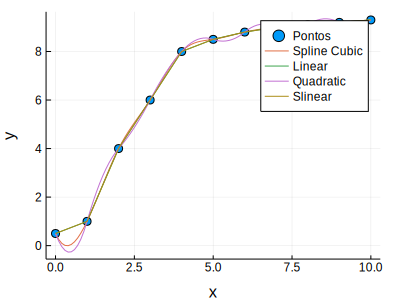

In [31]:
using Plots
gr()

x_interp = 0:0.1:10

scatter(x_dados, y_dados, label = "Pontos", xlabel = "x", ylabel = "y")
plot!(x_interp, interp_cub(x_interp), label  = "Spline Cubic")
plot!(x_interp, interp_li(x_interp), label  = "Linear")
plot!(x_interp, interp_qua(x_interp), label  = "Quadratic")
plot!(x_interp, interp_sl(x_interp), label = "Slinear", size = (400, 300))

### MATPLOTLIB

 Matplotlib  é uma biblioteca  Python  para construir gráficos 2D/3D, histogramas, gráficos de contorno, gráficos de barras, diagramas de erro, gráficos de dispersão, etc.  Matplotlib  foi originalmente escrito por John D. Hunter e atualmente é desenvolvido por Michael Droettboom. "Embora seja escrito principalmente em Python puro, faz uso intenso do NumPy e de outros pacotes para fornecer um bom desempenho, mesmo para grandes matrizes" (HUNTER, 2017). É interessante utilizá-lo diretamente em algumas ocasiões quando não há recurso adequado para gerar um gráfico específico na versão  PyPlot  para  Julia .

In [32]:
using PyCall
@pyimport matplotlib.pyplot as plt

In [33]:
x = 1:100
f1(x) = sec(x)*x 
f2(x) = cos(x)*x 

f2 (generic function with 1 method)

In [35]:
plt.plot(x, f1.(x), color = "red" , linewidth = 2.0, linestyle = "-.")
plt.plot(x, f2.(x), color = "blue", linewidth = 1.0, linestyle = "-")
plt.show()

QXcbConnection: XCB error: 3 (BadWindow), sequence: 842, resource id: 50333012, major code: 40 (TranslateCoords), minor code: 0


### SYMPY

"SymPy  é uma biblioteca para computação simbólica escrita inteiramente em  Python  e distribuída sob licença de software livre  BSD"  (LAMY, 2013). Não é prático utilizar o  SymPy  através do  PyCall  tendo em vista que já existe o pacote `SymPy.jl` para  Julia. Dessa forma, este tópico apresentará uma demonstração da possibilidade de usar o  SymPy  via  PyCall .

In [36]:
using PyCall            
@pyimport sympy as sp

In [37]:
x = sp.symbols("x")
y = sp.symbols("y")

PyObject y

In [38]:
a = x + x

PyObject 2*x

**Raízes de equações e sistemas de equações com `Solve()` e `NSolve()`**

In [39]:
# Raiz da equação
a = sp.solve(x^2 - 4, x)

2-element Array{PyObject,1}:
 PyObject -2
 PyObject 2 

**Exemplo**: Calcular a raiz numérica de $y = x^2 - 4$.

In [41]:
# Raiz numérica
sp.nsolve(x^2 - 4, 5)

PyObject mpf('2.0')

**Exemplo**: Calcular as raízes do sistema:

${\begin{cases}
& x^2 - y = 0\\ 
&  2y - x = 0  
\end{cases}}$


In [43]:
# Sistema de equações
Sol = sp.solve([x^2 - y, y*2 - x], [x, y])

2-element Array{Tuple{PyObject,PyObject},1}:
 (PyObject 0, PyObject 0)    
 (PyObject 1/2, PyObject 1/4)

In [44]:
# para converter para o tipo float
convert(Float64, Sol[1][1]), 
convert(Float64, Sol[1][2]), 
convert(Float64, Sol[2][1]), 
convert(Float64, Sol[2][2])

(0.0, 0.0, 0.5, 0.25)

### COMANDOS PYTHON 

In [45]:
;python -c 'import sympy as sp; x = sp.symbols("x"); print(x+x)'

2*x


In [46]:
run(`python -c 'import sympy as sp; x = sp.symbols("x"); print(x+x)'`);

2*x


#### SCRIPTS PYTHON

Julia permite executar scripts Python da seguinte forma:
```julia
;python -"opções" script.py 
```
Sendo `"opções"` as opções usadas para fornecer informações extras ou personalizar a execução de um script. 

Código de um simples script Python.
```python
# coding=UTF-8        
def multiplica(x, y):
    return x*y


a = 5.0;
b = 2.0;
resultado = multiplica(a, b);

# a virgula utilizada para separar a variável do valor é util para gerar dataframes
print("a, %d" % a)
print("b, %d" % b)
print("Resultado, %d" % resultado);
```


In [47]:
;python Scripts/script_python.py

a, 5
b, 2
Resultado, 10


Para executar um script Python em uma célula Jupyter:

In [48]:
py"""      
def multiplica(x, y):
    return x*y
"""

In [49]:
py"multiplica(5, 4)"

20

**DataFrames**

Os resultados de um script podem escritos em um arquivo csv e gravados em disco de acordo com o comando abaixo. A vírgula utilizada para separar a variável do valor é util para gerar dataframes.

In [50]:
;python Scripts/script_python.py ">" ConjDados/resultado_script_py.csv

a, 5
b, 2
Resultado, 10


In [51]:
run(pipeline(`python Scripts/script_python.py`, "ConjDados/resultado_script_py.csv"));

In [52]:
using CSV

In [53]:
# header = false serve para excluir o cabeçalho
matriz_script_py = CSV.read("ConjDados/resultado_script_py.csv", header = false)

,Column1,Column2
,String⍰,Int64⍰
1,a,5
2,b,2
3,Resultado,10


In [55]:
# para obter somente os elementos da segunda coluna da matriz
matriz_script_py.Column2

3-element Array{Union{Missing, Int64},1}:
  5
  2
 10

## INTERFACE COM C

As funções  C  são executadas via `ccall()`, no qual o nome da função  C  e a biblioteca em que ela (a função) está contida são passados como uma tupla no primeiro argumento, seguido pelo tipo de retorno da função, os tipos dos argumentos de função e finalmente os próprios argumentos. 
Sintaxe:
```julia
ccall((:funcao_C, biblioteca_C), Return_Tipo, (tipo_arg1, tipo_arg2...), a1, a2...)
```
Sendo:
+ função_C : função que será utilizada da biblioteca_C
+ biblioteca_C: biblioteca da linguagem C instalada no computador local
+ Return_Tipo: tipo de dado que será retornadao
+ tipo_arg1, tipo_arg2...: tipo dos argumentos arg1, arg2 e outros.
+ a1, a2...: Variáveis ou valores possíveis.

Para exemplificar a função `ccall()`, o código abaixo gera um número aleatório do tipo Inteiro 8 bits sem passar nenhum argumento.

In [1]:
ccall( (:rand, "libc"), Int8, () )

ErrorException: error compiling top-level scope: could not load library "libc"
/usr/lib/x86_64-linux-gnu/libc.so: invalid ELF header

In [2]:
# Potencia 
ccall((:pow, "libm"), Float64, (Float64, Float64), 3.0, 2.0)

ErrorException: error compiling top-level scope: could not load library "libm"
/usr/lib/x86_64-linux-gnu/libm.so: invalid ELF header

**Função genérica**

Uma forma muito útil é usar uma função genérica para passar argumentos para a função `ccall()`.

In [81]:
potencia(x, n) = ccall((:pow, "libm"), Float64, (Float64, Float64), x, n)

potencia (generic function with 1 method)

In [82]:
potencia(5, 2)

ErrorException: error compiling potencia: could not load library "libm"
/lib64/libm.so: invalid ELF header

Vetores

In [83]:
potencia.([1, 2, 3], 2)

ErrorException: error compiling materialize: could not load library "libm"
/lib64/libm.so: invalid ELF header

In [84]:
potencia.([1, 2, 3], [2, 3, 4])

ErrorException: error compiling materialize: could not load library "libm"
/lib64/libm.so: invalid ELF header

**Função a partir de uma biblioteca personalizada**

O  GCC  ( GNU Compiler Collection ) é uma distribuição integrada de compiladores para várias linguagens de programação (STALLMAN, 2003). Originalmente escrito somente para a linguagem de programação  C , atualmente possui suporte para as linguagens  C++ ,  Fortran ,  Ada ,  Java ,  Objective-C , entre outras. Além de compilar o código e gerar seu executável, o  GCC  possui também um pré-processador de código, que identifica possíveis erros de programação, permitindo ao programador identificar, tratar e corrigir o erro, além de forçar optmizações.

Código fonte 'fmultiplica_c.c':

```C
double multiplica(double x, double y)
{
return x*y; 
}

```

Para compilar a biblioteca use o código abaixo. Sintaxe:
```sh
gcc  -shared -lm -fPIC -o biblioteca_nome_funcao.so arquivo.c
```
Sendo:
+ -share:
+ -lm:
+ -fPIC:
+ -o:
+ arquivo.c: script fonte do código em C.
+ biblioteca_nome_funcao.so: nome da biblioteca compilada a partir do script.

In [85]:
;gcc  -shared -lm -fPIC -o bibmultiplica.so fmultiplica_c.c

**Para funcionar devemos observar**:

- O notebook Jupyter deve estar em execução no mesmo PATH onde a biblioteca `multiplica.so` se encontra;

- O PATH para a biblioteca `multiplica.so` deve estar em LD_LIBRARY_PATH;

- O PATH para a biblioteca deve ser colocado em Libdl.DL_LOAD_PATH através do comando:

```julia
    push!(Libdl.DL_LOAD_PATH,"path_da_biblioteca.so")
```
Sendo "path_da_biblioteca.so" a localização da biblioteca "multiplica.so". Ex: "/home/jmarcellopereira/NOTEBOOKS_JULIA/..."

In [86]:
push!(Libdl.DL_LOAD_PATH,"/media/jmarcellopereira/COISAS/jmarcello/ESTUDOS/COMPUTACAO-CIENTIFICA-NOTEBOOKS/JULIA/git_julia/juliatutorialbr-niveis-6/juliatutorialbr-v5-nivel-2/")

UndefVarError: UndefVarError: Libdl not defined

In [87]:
multiplica(x, y) = ccall((:multiplica,"bibmultiplica"),Float64,(Float64,Float64), x, y)

multiplica (generic function with 1 method)

In [88]:
multiplica(5, 9)

ErrorException: error compiling multiplica: could not load library "bibmultiplica"
bibmultiplica.so: cannot open shared object file: No such file or directory

Vetores

In [89]:
multiplica.([1, 2, 3],[4, 5, 6])

ErrorException: error compiling materialize: could not load library "bibmultiplica"
bibmultiplica.so: cannot open shared object file: No such file or directory

Uma boa pratica é criar um arquivo  Makefile  para automatizar a compilação do código e assim reduzir a digitação de várias linhas de comando. O binário  make  (/usr/bin/make) interpreta o conteúdo do arquivo  Makefile  e executa as regras definidas compilando para um arquivo executável. O código abaixo é um exemplo de  Makefile  para compilar o código "fmultiplica_c.c".

```sh
############################################################
COMPILADOR=gcc 

C_OPCOES=-c -Wall -lm -fPIC

FONTE=fmultiplica_c.c  # arquivo contendo o código da função
OBJETO= (FONTE:.c=.o)

.c.o:
	 (COMPILADOR)  (C_OPCOES)  < -o  @ 

gerar_biblioteca:  (OBJETO)
     (COMPILADOR) -shared -fPIC -o bibmultiplica.so  (OBJETO)

apagar:
	rm *.o *.so
#############################################################
```

**OBS: Cuidado ao copiar e colar! Podem ficar espaços no início das linhas:**

` (COMPILADOR)  (C_OPCOES)  < -o  @  ` 

` (COMPILADOR) -shared -fPIC -o bibmultiplica.so  (OBJETO)`

retire os espaços e complete com TAB.

Após salvar o arquivo  Makefile  no mesmo diretório onde se encontra o notebook  Jupyter  e o arquivo `script_c.c`. Execute no terminal o comando abaixo para compilar a biblioteca:

```sh
make gerar_biblioteca

```
ou em uma célula do  Jupyter  :

```julia
;make gerar_biblioteca
```
Para apagar os arquivos gerados após compilação, use: `make apagar`


### SCRIPTS C

Código
```C
#include<stdio.h>

int multiplica(float x, float y) 
{
  return(x*y); 
}
  
int main(void)
{
  float a = 5.0;
  float b = 2.0;  
  float resultado = multiplica(a, b);
  
// a virgula utilizada para separar a variável do valor é util para gerar dataframes
  
  printf("a,%f \n",a );
  printf("b,%f \n",b );
  printf("a*b,%f \n",resultado );
    
  return 0;
}
```

In [58]:
;gcc Scripts/script_c.c -lm -o programa_c

A opção `-lm` é importante para o  GCC  incluir a biblioteca `libm` responsável por funções matemáticas como `sqrt()`, `pow()`, etc

In [59]:
;./programa_c

a,5.000000 
b,2.000000 
a*b,10.000000 


## INTERFACE COM FORTRAN

Fortran

In [4]:
ccall((:sqrt, "libgfortran"), Float64, (Float64,), 100.0)

ErrorException: error compiling top-level scope: could not load library "libgfortran"
libgfortran.so: cannot open shared object file: No such file or directory

### SCRIPTS FORTRAN

Código

```fortran
program script_fortran 
implicit none 
 real a, b, resultado, multiplica
 a = 5.0
 b = 2.0     
 resultado = multiplica(a, b) 
 
 ! a virgula utilizada para separar a variável do valor é util para gerar dataframes
 
 print *,"a,", a 
 print *,"b,", b 
 print *,"a*b,", resultado 
 stop 
end

real function multiplica(x, y) 
implicit none 
  real x, y 
  multiplica = x*y
  return 
end 
```

In [61]:
;gfortran Scripts/script_fortran.f90 -o programa_fortran 

/bin/bash: gfortran: command not found


In [62]:
;./programa_fortran

./programa_fortran: error while loading shared libraries: libgfortran.so.5: cannot open shared object file: No such file or directory


Passando os dados para um arquivo `CSV`.

In [38]:
;./programa_fortran ">" "ConjDados/resultado_programa_f90.csv"

 a,   5.00000000    
 b,   2.00000000    
 a*b,   10.0000000    


In [68]:
using CSV, DataFrames

In [97]:
#header = false serve para excluir o cabeçalho
dados_programa_f90 = CSV.read("ConjDados/resultado_programa_f90.csv", header = false  )

,Column1,Column2
1,a,5.0
2,b,2.0
3,a*b,10.0


In [98]:
dados_programa_f90[2]

3-element Array{Union{Missing, Float64},1}:
  5.0
  2.0
 10.0

## INTERFACE COM OCTAVE

GNU Octave is a high-level language, primarily intended for numerical computations. It is typically used for such problems as solving linear and nonlinear equations, numerical linear algebra, statistical analysis, and for performing other numerical experiments. It may also be used as a batch-oriented language for automated data processing.

In [69]:
;octave-cli --eval "fzero(@(x) x^2 - 2*x - 1, [0, 5])"

ans =  2.4142


In [70]:
run(`octave-cli --eval "fzero(@(x) x^2 - 2*x - 1, [0, 5])"`)

ans =  2.4142


Process(`octave-cli --eval 'fzero(@(x) x^2 - 2*x - 1, [0, 5])'`, ProcessExited(0))

### SCRIPTS OCTAVE

```octave
% ============Arquivo "multiplica.m"===========

function R = multiplica(x, y)
	R = x*y;
end 

% ============fim_função========================

% ====== Arquivo "script_octave_matlab.m" ======

a = 5.0;
b = 2.0;
resultado = multiplica(a, b);

% a virgula utilizada para separar a variável do valor é util para gerar dataframes

printf("a,%f \n",a);
printf("b,%f \n",b);
printf("a*b,%f \n",resultado);

% ============fim_script========================
```

In [73]:
;octave-cli Scripts/script_octave.m

error: 'multiplica' undefined near line 3 column 13
error: called from
    Scripts/script_octave.m at line 3 column 11


## INTERFACE COM R



**RCALL** 

O pacote `RCall.jl` é uma forma de estabelecer comunicação entre Julia e $R$ de tal forma que uma instância de $R$ seja incorporada em Julia. Assim, é possível explorar as vantagens de ambos as linguagens. Pkg.add("RCall")

|                                  |                       Comandos                    |
|:---------------------------------|:--------------------------------------------------|
| Execute uma declaração em R      | `reval(plot(rnorm(10)))`                          |
| Criar uma variável               | `Rvar <- 123*321`                                 |
| Criar um objeto                  | `r_X = RObject([1 2; 4 5; 7 8])`                  |
| Salvar uma função                | `R_plot = Rplot`                                  |
| Carregar uma biblioteca          | `@rlibrary(biblioteca)` or `Rlibrary(biblioteca)` |
| Usar uma biblioteca carregada    | `Rmap(county)`                                    |
| Carregar uma variável no R       | `@rput X`                                         |
| Colocar uma variável R em Julia  | `@rget Y`                                         |



In [20]:
using Pkg
Pkg.build("RCall")

  Building CodecZlib → `~/.julia/packages/CodecZlib/DAjXH/deps/build.log`
  Building Conda ────→ `~/.julia/packages/Conda/uQitS/deps/build.log`
  Building RCall ────→ `~/.julia/packages/RCall/RPlFw/deps/build.log`


┌ Error: Error building `RCall`: 
│ [ Info: R library /usr/lib/R/lib/libR.so appears to be too old. RCall.jl requires R 3.4.0 or later.
│ ERROR: LoadError: Fail to use R at /usr/lib/R.
│ Stacktrace:
│  [1] error(::String) at ./error.jl:33
│  [2] top-level scope at /home/jmarcellopereira/.julia/packages/RCall/RPlFw/deps/build.jl:23
│  [3] include at ./boot.jl:317 [inlined]
│  [4] include_relative(::Module, ::String) at ./loading.jl:1044
│  [5] include(::Module, ::String) at ./sysimg.jl:29
│  [6] include(::String) at ./client.jl:392
│  [7] top-level scope at none:0
│ in expression starting at /home/jmarcellopereira/.julia/packages/RCall/RPlFw/deps/build.jl:10
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Pkg/src/Operations.jl:1097


In [19]:
using CSV, RCall, DataFrames

┌ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
└ @ Base loading.jl:1192
ERROR: LoadError: RCall not properly installed. Please run Pkg.build("RCall")
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] top-level scope at /home/jmarcellopereira/.julia/packages/RCall/RPlFw/src/RCall.jl:34
 [3] include at ./boot.jl:317 [inlined]
 [4] include_relative(::Module, ::String) at ./loading.jl:1044
 [5] include(::Module, ::String) at ./sysimg.jl:29
 [6] top-level scope at none:2
 [7] eval at ./boot.jl:319 [inlined]
 [8] eval(::Expr) at ./client.jl:393
 [9] top-level scope at ./none:3
in expression starting at /home/jmarcellopereira/.julia/packages/RCall/RPlFw/src/RCall.jl:31


ErrorException: Failed to precompile RCall [6f49c342-dc21-5d91-9882-a32aef131414] to /home/jmarcellopereira/.julia/compiled/v1.0/RCall/8GFyb.ji.

In [11]:
tabela = CSV.read("ConjDados/dados_reta.csv")

,x,y
,Float64⍰,Float64⍰
1,0.0,-0.18344
2,0.2,-0.131101
3,0.4,0.0268876
4,0.8,0.110533
5,1.0,0.253945
6,1.2,0.25719
7,1.4,0.531889
8,1.6,0.579048
9,2.0,0.935181


In [12]:
x = tabela[:x]
y = tabela[:y];

As variáveis "x" e "y" pertencem à linguagem Julia. Para passar essas variáveis para R, deve ser usado o macro `@rput nome_variavel`.

In [13]:
@rput x
@rput y;

LoadError: UndefVarError: @rput not defined

In [14]:
# Gráfico com o R
R"plot(x, y)"

LoadError: UndefVarError: @R_str not defined

In [67]:
# Fit linear com o R
R"reta <- lm(y ~ x)"
R"summary(reta)"

RObject{VecSxp}

Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.254223 -0.073119  0.005463  0.076230  0.190989 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.17573    0.06089  -2.886   0.0137 *  
x            0.45996    0.03166  14.530 5.59e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1239 on 12 degrees of freedom
Multiple R-squared:  0.9462,	Adjusted R-squared:  0.9417 
F-statistic: 211.1 on 1 and 12 DF,  p-value: 5.591e-09



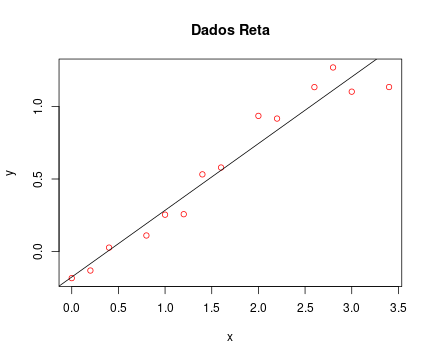

RObject{NilSxp}
NULL


In [105]:
# Gráfico com reta
R"plot(x, y, xlab ='x', ylab='y', col = 'red', main='Dados Reta')"
R"abline(reta)"

### LINHA DE COMANDO

É possível executar comandos, funções e scripts R através do REPL ou célula do Jupyter. Para executar um comando ou função use:

```julia
;Rscript -e "comando/função"
```
Ou
```julia
run(`Rscript -e "comando/função"`);
```

In [44]:
# derivada
run(`Rscript -e "D(expression(x^2 + x), 'x')"`);

2 * x + 1


In [68]:
;Rscript -e "D(expression(x^2 + x), 'x')"

2 * x + 1


#### SCRIPTS R
Sintaxe: 
```julia
;Rscript "diretório_script/script.r"
```
Ou 
```julia
run(`Rscript "diretório_script/script.r"`)
```

```R
mult <- function(a,b) {
  a*b
}
a = 5.0
b = 2.0
resultado = mult(a,b)

# a virgula utilizada para separar a variável do valor é util para gerar dataframes

sprintf("a,%f", a)
sprintf("b,%f", b)
sprintf("resultado,%f",resultado)

```

In [69]:
;Rscript "Scripts/script_R.r"

[1] "a,5.000000"
[1] "b,2.000000"
[1] "a*b,10.000000"


Para executar um script Python em uma célula Jupyter:

In [72]:
R"""
mult <- function(a, b) {
  a*b
}

resultado = mult(a, b)
"""

RCall.REvalError: REvalError: Error in mult(a, b) : object 'a' not found

In [75]:
R"mult(5, 3)"

RObject{RealSxp}
[1] 15


## INTERFACE COM MAXIMA

Maxima é um CAS, sistema de computação algébrica, escrito em Common Lisp. "É um sistema de manipulação de expressões simbólicas e numéricas, incluindo diferenciação, integração, desenvolvimentos em séries de Taylor, transformações de Laplace, equações diferenciais ordinárias, sistemas de equações lineares e vetores, matrizes e tensores" (CAMPUZANO, 2016).  Maxima  produz resultados de alta precisão usando frações exatas, números inteiros de precisão arbitrária e números de ponto flutuante com precisão variável. Para utilizar o Maxima é necessário instalar o  software  no computador (http://maxima.sourceforge.net/pt/download.html) e o pacote `maxima.jl`. Para instalar use:
```julia
using Pkg
Pkg.add("Maxima")
```
Sintaxe básica:
```julia
mcall("comando_maxima")
```
O resultado do comando é do tipo `string`

In [ ]:
using Maxima

**Integração**

Sintaxe:
```julia
mcall("integrate(expressão_variável, variável)")
```

In [77]:
# resultado do tipo string
int_m = mcall("integrate(sin(x)^3, x)")

"cos(x)^3/3-cos(x)"

In [78]:
# transformando o resultado em uma função
@eval f(x) =  $(Meta.parse(int_m))

f (generic function with 1 method)

In [79]:
f(pi/2)

-6.123233995736766e-17

**Gráficos 2D/3D**

```julia
mcall("plot2d(expressão_variável, [variável, a, b])")
mcall("plot2d([expressão_variável, expressão_variável], [variável, a, b])")

mcall("plot3d(expressão_variáveis, [variável_1, a, b], [variável_2, a, b])")
```
sendo "a" e "b" o intervalo.

In [80]:
# gráfico 2d
mcall("plot2d(exp(x)*log(x), [x, 0, 2])")

"plot2d:expressionevaluatestonon-numericvaluesomewhereinplottingrange.[\"/tmp/maxout5565.gnuplot_pipes\"]"

<img src="Figuras/maxima-2d.png" align="center" width="500">

In [81]:
#gráfico 3d
mcall("plot3d(x^2 + y^2, [x, -10, 10], [y, -10, 10])")

"[\"/tmp/maxout5565.gnuplot_pipes\"]"

<img src="Figuras/maxima-3d.png" align="center" width="500">

**Operações Algébricas**

In [82]:
# soma algébrica
mcall("1*f/2 + 2*f^2/3 + 3*f^2/4 + f/5")

"(17*f^2)/12+(7*f)/10"

In [83]:
# simplicação
mcall("factor(1*f/2 + 2*f^2/3 + 3*f^2/4 + f/5)")

"(f*(85*f+42))/60"

In [84]:
# simplificação para expressões com radicais, potências, exponenciais ou logaritmos
mcall("radcan((log(x + x^2) - log(x))^a/log(1 + x)^(a/2))")

"log(x+1)^(a/2)"

### PACOTES ADICIONAIS DO MÁXIMA

 Maxima  possui, além dos pacotes da biblioteca padrão, pacotes para funções específicas. Alguns desses pacotes são: diag, distrib, draw, dynamics, finance, fractals, functs, graphs, grobner, impdiff, lapack, linearalgebra, lsquares, mnewton, orthopoly, plotdf, stats, unit, entre outros. Para usar um pacote adicional use:
```julia
mcall("load(nome_pacote)")
```

In [85]:
# Pacote para resolver equações e sistemas de equações pelo método de Newton
mcall("load(mnewton)")

"\"/usr/share/maxima/5.41.0/share/mnewton/mnewton.mac\""

In [86]:
# sistema de equações
sol_sis = mcall("mnewton([x*y - 2*x^3, -x^2 + 8*y - 2], [x, y], [5, 5])")

"[[x=0.3651483716701107,y=0.2666666666666667]]"

### LINHA DE COMANDO

É possível executar comandos, funções e scripts Maxima através do REPL ou célula Jupyter. Para executar um comando ou função use:

```julia
;maxima --batch-strung="comando/função;"
```
Ou
```julia
run(`maxima --batch-string="comando/função;"`);
```

In [87]:
;maxima --batch-string="diff(sin(x),x);"

Maxima 5.41.0 http://maxima.sourceforge.net
using Lisp SBCL 1.4.2-1.fc28
Distributed under the GNU Public License. See the file COPYING.
Dedicated to the memory of William Schelter.
The function bug_report() provides bug reporting information.
(%i1) diff(sin(x),x)
(%o1)                               cos(x)


In [88]:
run(`maxima --batch-string="integrate(sin(x)*x,x);"`);

Maxima 5.41.0 http://maxima.sourceforge.net
using Lisp SBCL 1.4.2-1.fc28
Distributed under the GNU Public License. See the file COPYING.
Dedicated to the memory of William Schelter.
The function bug_report() provides bug reporting information.
(%i1) integrate(sin(x)*x,x)
(%o1)                          sin(x) - x cos(x)


#### SCRIPTS MAXIMA 

Sintaxe: 
```julia
;maxima "-b" "diretório_script/script.mac"
```
Ou 
```julia
run(`maxima "-b" "diretório_script/script.mac"`)
```

Código:

```lisp
/* início script */

f(x, y):= x*y;

a: 5;
b: 2;

f(a,b);

/* fim script */
```

In [49]:
;maxima -b "Scripts/script_maxima.mac"

Maxima 5.41.0 http://maxima.sourceforge.net
using Lisp SBCL 1.4.2-1.fc28
Distributed under the GNU Public License. See the file COPYING.
Dedicated to the memory of William Schelter.
The function bug_report() provides bug reporting information.
(%i1) batch("Scripts/script_maxima.mac")

read and interpret file: /run/media/jmarcellopereira/COISAS/jmarcello/ESTUDOS/COMPUTACAO-CIENTIFICA-NOTEBOOKS/JULIA/git_julia/julia-tutorial-niveis-6/juliatutorialbr-v6-nivel-2/Scripts/script_maxima.mac
(%i2) f(x,y):=x*y
(%o2)                           f(x, y) := x y
(%i3) a:5
(%o3)                                  5
(%i4) b:2
(%o4)                                  2
(%i5) Resultado:f(a,b)
(%o5)                                 10
(%o6) /run/media/jmarcellopereira/COISAS/jmarcello/ESTUDOS/COMPUTACAO-CIENTIFI\
CA-NOTEBOOKS/JULIA/git_julia/julia-tutorial-niveis-6/juliatutorialbr-v6-nivel-\
2/Scripts/script_maxima.mac


In [50]:
run(`maxima -b "Scripts/script_maxima.mac"`)

Maxima 5.41.0 http://maxima.sourceforge.net
using Lisp SBCL 1.4.2-1.fc28
Distributed under the GNU Public License. See the file COPYING.
Dedicated to the memory of William Schelter.
The function bug_report() provides bug reporting information.
(%i1) batch("Scripts/script_maxima.mac")

read and interpret file: /run/media/jmarcellopereira/COISAS/jmarcello/ESTUDOS/COMPUTACAO-CIENTIFICA-NOTEBOOKS/JULIA/git_julia/julia-tutorial-niveis-6/juliatutorialbr-v6-nivel-2/Scripts/script_maxima.mac
(%i2) f(x,y):=x*y
(%o2)                           f(x, y) := x y
(%i3) a:5
(%o3)                                  5
(%i4) b:2
(%o4)                                  2
(%i5) Resultado:f(a,b)
(%o5)                                 10
(%o6) /run/media/jmarcellopereira/COISAS/jmarcello/ESTUDOS/COMPUTACAO-CIENTIFI\
CA-NOTEBOOKS/JULIA/git_julia/julia-tutorial-niveis-6/juliatutorialbr-v6-nivel-\
2/Scripts/script_maxima.mac


Process(`maxima -b Scripts/script_maxima.mac`, ProcessExited(0))

## REFERENCIA BIBLIOGRÁFICA

IVAN , Idris. **NumPy Beginner's Guide**. 3. ed. Birmingham, UK: Packt Publishing Ltd, 2015. 319 p. 

BRESSERT, Eli . **SciPy and NumPy**. 1. ed. Sebastopol, USA: O’Reilly Media, 2012. 57 p. 

LAMY, Ronan . **Instant SymPy Starter**. 1. ed. Birmingham, UK: Packt Publishing Ltd, 2013. 52 p. 

HUNTER, John et al. **Matplotlib**. 2.1.0. ed. [S.l.: s.n.], 2017. 1823 p. Disponível em: <https://matplotlib.org/Matplotlib.pdf>. Acesso em: 29 nov. 2017. 

STALLMAN, Richard . **Using the GNU Compiler Collection**. 1. ed. Boston, USA: GNU Press, 2003. 923 p. Disponível em: <https://gcc.gnu.org/onlinedocs/gcc.pdf>. Acesso em: 21 jun. 2017.

CAMPUZANO, Antonio Vigueras . **Prácticas de Cálculo Numérico con MAXIMA**. 1. ed. Cartagena, ES: [s.n.], 2016. 180 p. Disponível em: <http://repositorio.upct.es/bitstream/handle/10317/5378/isbn9788460878681.pdf?sequence=7&isAllowed=y>. Acesso em: 08 nov. 2017. 